In [1733]:
%config IPCompleter.greedy = True

In [1734]:
import pandas as pd
import numpy as np

In [1735]:
df = pd.read_csv('telecom_churn_data.csv')

In [1736]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1737]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [1738]:
df['mobile_number'].nunique()

99999

In [1739]:
df['circle_id'].nunique()

1

In [1740]:
df['loc_og_t2o_mou'].nunique()

1

In [1741]:
df['std_og_t2o_mou'].nunique()

1

In [1742]:
df['loc_ic_t2o_mou'].nunique()

D:\Software\Anaconda\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


1

In [1743]:
df['last_date_of_month_6'].nunique()

1

In [1744]:
df['last_date_of_month_7'].nunique()

1

In [1745]:
df['last_date_of_month_8'].nunique()

1

In [1746]:
df['last_date_of_month_9'].nunique()

1

In [1747]:
df['total_rech_amt_9'].describe(percentiles =[.25, .5, .70])

count    99999.000000
mean       303.345673
std        404.588583
min          0.000000
25%         52.000000
50%        200.000000
70%        355.000000
max      37235.000000
Name: total_rech_amt_9, dtype: float64

In [1748]:
df['total_rech_amt_6'].describe(percentiles =[.25, .5, .70])

count    99999.000000
mean       327.514615
std        398.019701
min          0.000000
25%        109.000000
50%        230.000000
70%        378.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

In [1749]:
df['total_rech_amt_7'].describe(percentiles =[.25, .5, .70])

count    99999.000000
mean       322.962970
std        408.114237
min          0.000000
25%        100.000000
50%        220.000000
70%        370.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64

In [1750]:
# filtered_df = df[(df.total_rech_amt_6 >= 378) & (df.total_rech_amt_7 >= 370)]

# filtered_df.info()

In [1751]:
df_6_and_7 = df['total_rech_amt_6'] + df['total_rech_amt_7']

df_6_and_7.describe(percentiles =[.25, .5, .70])

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
25%        230.000000
50%        458.000000
70%        737.000000
max      75525.000000
dtype: float64

In [1752]:
filtered_df = df[(df.total_rech_amt_6 + df.total_rech_amt_7 > 737)]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


In [1753]:
len(filtered_df['total_ic_mou_9'].notna())

29979

In [1754]:
len(filtered_df['total_og_mou_9'].notna())

29979

In [1755]:
len(filtered_df['vol_2g_mb_9'].notna())

29979

In [1756]:
len(filtered_df['vol_3g_mb_9'].notna())

29979

In [1757]:
filtered_df['churn'] = filtered_df.apply(
    lambda row : 
        0 if row['total_ic_mou_9'] + row['total_og_mou_9'] + row['vol_2g_mb_9'] + row['vol_3g_mb_9'] > 0 else 1, axis=1
)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1758]:
filtered_df[filtered_df['churn'] == 0][['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0
21,252.61,1031.53,0.0,0.0


In [1759]:
filtered_df[filtered_df['churn'] == 0][['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27390 entries, 8 to 99997
Data columns (total 4 columns):
total_ic_mou_9    27390 non-null float64
total_og_mou_9    27390 non-null float64
vol_2g_mb_9       27390 non-null float64
vol_3g_mb_9       27390 non-null float64
dtypes: float64(4)
memory usage: 1.0 MB


In [1760]:
filtered_df[filtered_df['churn'] == 1][['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0


In [1761]:
filtered_df[filtered_df['churn'] == 1][['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 7 to 99961
Data columns (total 4 columns):
total_ic_mou_9    2589 non-null float64
total_og_mou_9    2589 non-null float64
vol_2g_mb_9       2589 non-null float64
vol_3g_mb_9       2589 non-null float64
dtypes: float64(4)
memory usage: 101.1 KB


In [1762]:
len(filtered_df[(filtered_df.total_rech_num_6 > 0) & (filtered_df.total_rech_amt_6 == 0)])

367

In [1763]:
len(filtered_df[(filtered_df.total_rech_num_7 > 0) & (filtered_df.total_rech_amt_7 == 0)])

439

In [1764]:
len(filtered_df[(filtered_df.total_rech_num_8 > 0) & (filtered_df.total_rech_amt_8 == 0)])

1587

In [1765]:
len(filtered_df)

29979

In [1766]:
filtered_df.drop(filtered_df[(filtered_df.total_rech_num_6 > 0) & (filtered_df.total_rech_amt_6 == 0)].index, inplace=True)
filtered_df.drop(filtered_df[(filtered_df.total_rech_num_7 > 0) & (filtered_df.total_rech_amt_7 == 0)].index, inplace=True)
filtered_df.drop(filtered_df[(filtered_df.total_rech_num_8 > 0) & (filtered_df.total_rech_amt_8 == 0)].index, inplace=True)

D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1767]:
len(filtered_df)

27827

In [1768]:
filtered_df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [1769]:
filtered_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.0,0


In [1770]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27827 entries, 7 to 99997
Columns: 227 entries, mobile_number to churn
dtypes: float64(179), int64(36), object(12)
memory usage: 48.4+ MB


In [1771]:
filtered_df.reset_index(inplace=True, drop=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27827 entries, 0 to 27826
Columns: 227 entries, mobile_number to churn
dtypes: float64(179), int64(36), object(12)
memory usage: 48.2+ MB


In [1772]:
filtered_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
4,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.0,0


In [1773]:
# len(filtered_df.notna())
filtered_df.isna().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou             87
std_og_t2o_mou             87
loc_ic_t2o_mou             87
last_date_of_month_6        0
last_date_of_month_7       31
last_date_of_month_8      154
last_date_of_month_9      347
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6               158
onnet_mou_7               152
onnet_mou_8               354
onnet_mou_9              1025
offnet_mou_6              158
offnet_mou_7              152
offnet_mou_8              354
offnet_mou_9             1025
roam_ic_mou_6             158
roam_ic_mou_7             152
roam_ic_mou_8             354
roam_ic_mou_9            1025
roam_og_mou_6             158
roam_og_mou_7             152
roam_og_mou_8             354
roam_og_mou_9            1025
loc_og_t2t_mou_6          158
                        ...  
night_pck_user_6        16959
night_pck_user_7        16613
night_pck_

In [1774]:
filtered_df = filtered_df.fillna(0)

In [1775]:
len(filtered_df.notna())

27827

In [1776]:
filtered_df.isna().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
onnet_mou_9             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
offnet_mou_9            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_ic_mou_9           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
roam_og_mou_9           0
loc_og_t2t_mou_6        0
                       ..
night_pck_user_6        0
night_pck_user_7        0
night_pck_user_8        0
night_pck_user_9        0
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8            0
monthly_2g_9

In [1777]:
filtered_df.drop(filtered_df.columns[157:161], axis=1 , inplace=True)
filtered_df.drop(filtered_df.columns[149:153], axis=1 , inplace=True)
filtered_df.drop(filtered_df.columns[:9], axis=1, inplace=True)

filtered_df.columns.values

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f

In [1778]:
# new_df = filtered_df.drop(filtered_df.columns[157:161], axis=1 )
# new_df.columns.values

In [1779]:
# new_df = filtered_df.drop(filtered_df.columns[149:153], axis=1 )

In [1780]:
# new_df.columns.values

In [1781]:
import re
cols = set()
for x in filtered_df.columns:
   if(re.findall("[6-9]$", x)):
       a=x[0:len(x)-2].rstrip('_')
       cols.add(a)

In [1782]:
len(cols)

52

In [1783]:
print(cols)

{'roam_og_mou', 'av_rech_amt_data', 'total_og_mou', 'monthly_2g', 'loc_og_t2t_mou', 'std_og_t2m_mou', 'std_ic_t2o_mou', 'count_rech_2g', 'std_og_t2t_mou', 'count_rech_3g', 'vol_2g_mb', 'total_rech_amt', 'vbc_3g', 'arpu_2g', 'roam_ic_mou', 'last_day_rch_amt', 'arpu', 'std_og_mou', 'spl_og_mou', 'std_ic_mou', 'sachet_2g', 'std_og_t2f_mou', 'std_ic_t2f_mou', 'offnet_mou', 'std_ic_t2t_mou', 'loc_og_t2c_mou', 'total_ic_mou', 'og_others', 'loc_ic_mou', 'ic_others', 'std_og_t2c_mou', 'vol_3g_mb', 'night_pck_user', 'loc_og_mou', 'loc_og_t2f_mou', 'fb_user', 'sachet_3g', 'max_rech_amt', 'loc_ic_t2f_mou', 'isd_og_mou', 'loc_ic_t2m_mou', 'spl_ic_mou', 'total_rech_data', 'loc_ic_t2t_mou', 'max_rech_data', 'arpu_3g', 'total_rech_num', 'loc_og_t2m_mou', 'isd_ic_mou', 'onnet_mou', 'std_ic_t2m_mou', 'monthly_3g'}


In [1784]:
for column in cols:
    col1 = column+"_6"
    col2 = column+"_7"
    col3 = column+"_8"
    print(filtered_df[col1])
    calculatedVal = (filtered_df[col1]+filtered_df[col2]+filtered_df[col3])/3
    print(len(calculatedVal))

0         23.74
1          0.00
2          7.98
3          0.00
4          0.00
5          9.89
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17        19.21
18         2.28
19         0.00
20         0.00
21         0.00
22       306.66
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
          ...  
27797      0.00
27798    530.71
27799      0.00
27800      0.00
27801      0.00
27802      0.00
27803      0.00
27804      0.00
27805      0.00
27806      0.00
27807      0.00
27808      1.98
27809      0.00
27810      0.00
27811     14.14
27812      0.00
27813      0.00
27814      0.00
27815      0.00
27816      0.00
27817     31.06
27818     11.29
27819      0.00
27820      0.00
27821      0.06
27822     46.04
27823      0.00
27824      0.00
27825      0.00
27826      0.00
Name: roam_og_mou_6, Len

In [1785]:
def calculate(col):
    col1 = column+"_6"
    col2 = column+"_7"
    col3 = column+"_8"
#     print(col1 + col2+ col3)
    calculatedVal = (filtered_df[col1]+filtered_df[col2]+filtered_df[col3])/3
#     print(calculatedVal)
    return calculatedVal
    

In [1786]:
for column in cols:
    filtered_df[column + '_agg'] = calculate(column)

In [1787]:
filtered_df.columns.values

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f

In [1788]:
filtered_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,total_rech_data_agg,loc_ic_t2t_mou_agg,max_rech_data_agg,arpu_3g_agg,total_rech_num_agg,loc_og_t2m_mou_agg,isd_ic_mou_agg,onnet_mou_agg,std_ic_t2m_mou_agg,monthly_3g_agg
0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0.000000,39.236667,0.000000,0.00,5.666667,306.096667,16.060000,54.936667,119.920000,0.0
1,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,1.666667,11.330000,59.000000,6.61,18.000000,67.360000,0.000000,266.600000,9.053333,0.0
2,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,1.000000,42.680000,7.666667,0.00,7.000000,164.290000,233.593333,381.463333,218.610000,0.0
3,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0.000000,47.220000,0.000000,0.00,6.000000,182.520000,0.076667,65.043333,55.230000,0.0
4,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.000000,10.736667,0.000000,0.00,25.000000,94.850000,0.000000,106.553333,69.220000,0.0


In [1789]:
def drop_redundant(col):
    print(col)
    col1 = column+"_6"
    col2 = column+"_7"
    col3 = column+"_8"
    filtered_df.drop([col1], inplace=True, axis=1)
    filtered_df.drop([col2], inplace=True, axis=1)
    filtered_df.drop([col3], inplace=True, axis=1)

In [1790]:
for column in cols:
    drop_redundant(column)

roam_og_mou
av_rech_amt_data
total_og_mou
monthly_2g
loc_og_t2t_mou
std_og_t2m_mou
std_ic_t2o_mou
count_rech_2g
std_og_t2t_mou
count_rech_3g
vol_2g_mb
total_rech_amt
vbc_3g
arpu_2g
roam_ic_mou
last_day_rch_amt
arpu
std_og_mou
spl_og_mou
std_ic_mou
sachet_2g
std_og_t2f_mou
std_ic_t2f_mou
offnet_mou
std_ic_t2t_mou
loc_og_t2c_mou
total_ic_mou
og_others
loc_ic_mou
ic_others
std_og_t2c_mou
vol_3g_mb
night_pck_user
loc_og_mou
loc_og_t2f_mou
fb_user
sachet_3g
max_rech_amt
loc_ic_t2f_mou
isd_og_mou
loc_ic_t2m_mou
spl_ic_mou
total_rech_data
loc_ic_t2t_mou
max_rech_data
arpu_3g
total_rech_num
loc_og_t2m_mou
isd_ic_mou
onnet_mou
std_ic_t2m_mou
monthly_3g


for col in cols:
    print(col)
    drop_redundant(col)

srs = pd.Series(calculatedVal('arpu'))
arpu = pd.DataFrame( srs,  columns='arpu_aggregated')

In [1791]:
len(filtered_df.columns.values)

106

In [1792]:
filtered_df.columns.values

array(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9',
       'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9',
       'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       '

In [1793]:
def drop_last_month(col):
    col1 = column+"_9"
    filtered_df.drop([col1], axis=1, inplace=True)


In [1794]:
filtered_df_before_dropping_9 = filtered_df
for column in cols:
    drop_last_month(column)

In [1795]:
filtered_df.head()

,aon,churn,roam_og_mou_agg,av_rech_amt_data_agg,total_og_mou_agg,monthly_2g_agg,loc_og_t2t_mou_agg,std_og_t2m_mou_agg,std_ic_t2o_mou_agg,count_rech_2g_agg,...,total_rech_data_agg,loc_ic_t2t_mou_agg,max_rech_data_agg,arpu_3g_agg,total_rech_num_agg,loc_og_t2m_mou_agg,isd_ic_mou_agg,onnet_mou_agg,std_ic_t2m_mou_agg,monthly_3g_agg
0,802,1,24.796667,0.0,482.310000,0.000000,41.016667,43.596667,0.0,0.000000,...,0.000000,39.236667,0.000000,0.00,5.666667,306.096667,16.060000,54.936667,119.920000,0.0
1,315,0,0.000000,82.0,370.526667,0.333333,175.736667,33.140000,0.0,1.666667,...,1.666667,11.330000,59.000000,6.61,18.000000,67.360000,0.000000,266.600000,9.053333,0.0
2,2607,0,14.893333,23.0,704.920000,0.000000,30.610000,155.080000,0.0,1.000000,...,1.000000,42.680000,7.666667,0.00,7.000000,164.290000,233.593333,381.463333,218.610000,0.0
3,511,0,5.913333,0.0,288.733333,0.000000,58.383333,35.263333,0.0,0.000000,...,0.000000,47.220000,0.000000,0.00,6.000000,182.520000,0.076667,65.043333,55.230000,0.0
4,720,0,0.000000,0.0,985.890000,0.000000,11.326667,783.696667,0.0,0.000000,...,0.000000,10.736667,0.000000,0.00,25.000000,94.850000,0.000000,106.553333,69.220000,0.0


In [1796]:
# !pip install imblearn

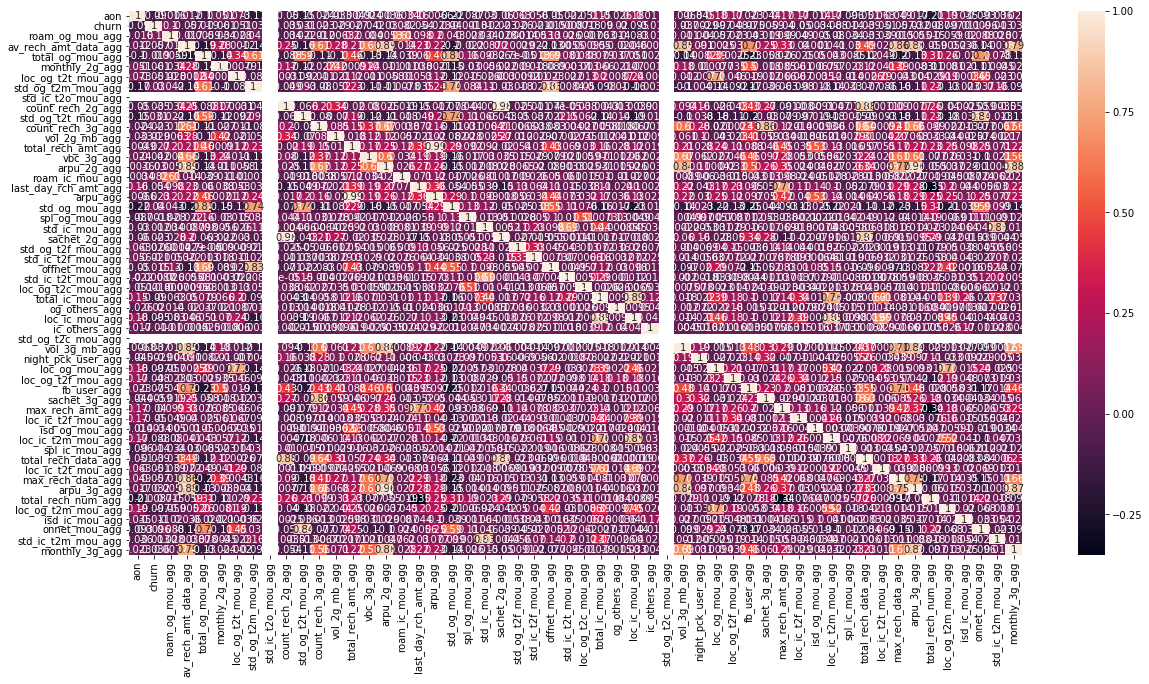

In [1797]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(filtered_df.corr(),annot = True)
plt.show()

In [1798]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1799]:
smote = SMOTE()

In [1800]:
# Putting feature variable to X
X = filtered_df.drop(['churn'], axis=1)

X.head()

,aon,roam_og_mou_agg,av_rech_amt_data_agg,total_og_mou_agg,monthly_2g_agg,loc_og_t2t_mou_agg,std_og_t2m_mou_agg,std_ic_t2o_mou_agg,count_rech_2g_agg,std_og_t2t_mou_agg,...,total_rech_data_agg,loc_ic_t2t_mou_agg,max_rech_data_agg,arpu_3g_agg,total_rech_num_agg,loc_og_t2m_mou_agg,isd_ic_mou_agg,onnet_mou_agg,std_ic_t2m_mou_agg,monthly_3g_agg
0,802,24.796667,0.0,482.310000,0.000000,41.016667,43.596667,0.0,0.000000,13.200000,...,0.000000,39.236667,0.000000,0.00,5.666667,306.096667,16.060000,54.936667,119.920000,0.0
1,315,0.000000,82.0,370.526667,0.333333,175.736667,33.140000,0.0,1.666667,90.856667,...,1.666667,11.330000,59.000000,6.61,18.000000,67.360000,0.000000,266.600000,9.053333,0.0
2,2607,14.893333,23.0,704.920000,0.000000,30.610000,155.080000,0.0,1.000000,343.540000,...,1.000000,42.680000,7.666667,0.00,7.000000,164.290000,233.593333,381.463333,218.610000,0.0
3,511,5.913333,0.0,288.733333,0.000000,58.383333,35.263333,0.0,0.000000,4.566667,...,0.000000,47.220000,0.000000,0.00,6.000000,182.520000,0.076667,65.043333,55.230000,0.0
4,720,0.000000,0.0,985.890000,0.000000,11.326667,783.696667,0.0,0.000000,95.220000,...,0.000000,10.736667,0.000000,0.00,25.000000,94.850000,0.000000,106.553333,69.220000,0.0


In [1801]:
# Putting response variable to y
y = filtered_df['churn']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [1802]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1803]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [1804]:
len(X_train_smote)

36586

In [1805]:
np.count_nonzero(y_train_smote)

18293

In [1806]:
np.unique(y_train_smote)

array([0, 1], dtype=int64)

In [1807]:
#Calculating churn rate

churn = (sum(filtered_df['churn'])/len(filtered_df['churn'].index))*100
churn

5.940273834764797

### Feature Scaling

In [1808]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)

X_train_smote


array([[ 0.25288647,  0.09143757, -0.30165574, ..., -0.49049231,
        -0.16518374, -0.33118108],
       [-0.8166597 , -0.12430685, -0.50329201, ..., -0.03308533,
         0.50447253, -0.33118108],
       [ 1.97513005, -0.33590348, -0.50329201, ..., -0.69518603,
        -0.18762525, -0.33118108],
       ...,
       [-0.88943129, -0.32698112, -0.50329201, ..., -0.26884741,
        -0.26327492, -0.33118108],
       [ 0.50562835, -0.3242233 , -0.50329201, ..., -0.16434558,
        -0.31100667, -0.33118108],
       [-0.41525376,  0.06279299, -0.50329201, ..., -0.57103904,
        -0.22203759, -0.33118108]])

In [1809]:
X_test = scaler.transform(X_test)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## PCA on the data

In [1810]:
X_train_smote.shape
# We have 50 variables

(36586, 53)

In [1811]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1812]:
#Doing the PCA on the train data
pca.fit(X_train_smote)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [1813]:
pca.components_

array([[ 4.42238999e-02, -1.49745739e-02,  3.26791081e-01, ...,
        -8.59589147e-02,  7.18270568e-03,  2.73835435e-01],
       [ 5.77607007e-02,  1.94236860e-02, -4.45431706e-02, ...,
         1.56048335e-01,  1.00150008e-01, -1.45900055e-02],
       [-1.56084223e-01,  7.75399767e-02,  8.59930417e-02, ...,
         2.14406338e-01,  9.26219460e-03,  9.48252653e-02],
       ...,
       [ 0.00000000e+00,  2.98806119e-16, -3.83616176e-16, ...,
        -1.54043445e-15,  9.57012247e-14, -1.46901891e-02],
       [-0.00000000e+00,  1.94289029e-16, -2.86736879e-16, ...,
        -2.77555756e-16, -7.74380560e-15,  1.42291486e-02],
       [-0.00000000e+00,  1.91686944e-16, -1.46968678e-16, ...,
        -6.24500451e-16, -9.10729825e-17, -2.36147907e-14]])

In [1814]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.044224,0.057761,aon
1,-0.014975,0.019424,roam_og_mou_agg
2,0.326791,-0.044543,av_rech_amt_data_agg
3,-0.100215,0.296876,total_og_mou_agg
4,0.102155,-0.015626,monthly_2g_agg


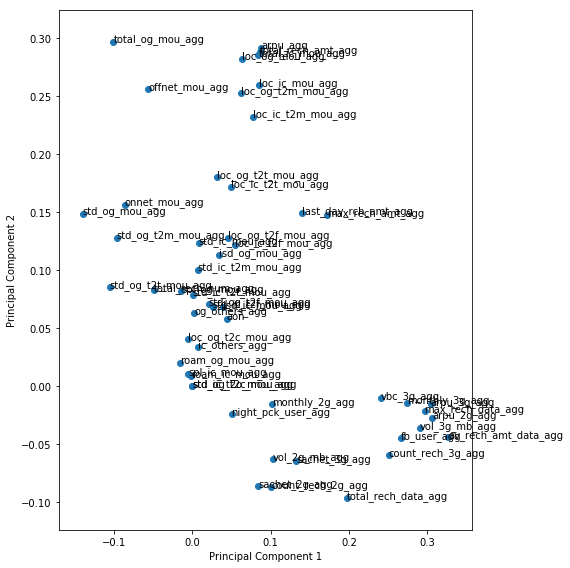

In [1815]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [1816]:
pca.explained_variance_ratio_

array([1.59090393e-01, 9.94859967e-02, 8.55202448e-02, 7.12486521e-02,
       4.77330877e-02, 4.67747322e-02, 3.91549948e-02, 3.70726877e-02,
       3.33948188e-02, 2.97990419e-02, 2.84141596e-02, 2.50466991e-02,
       2.29250006e-02, 2.12703920e-02, 2.08306787e-02, 1.99809901e-02,
       1.94955339e-02, 1.90122440e-02, 1.65131894e-02, 1.58759950e-02,
       1.54451105e-02, 1.48990767e-02, 1.46006502e-02, 1.30515876e-02,
       1.22379094e-02, 1.00864056e-02, 9.09713442e-03, 8.68122511e-03,
       8.01283480e-03, 7.38483833e-03, 5.67904320e-03, 5.25945302e-03,
       4.55441115e-03, 4.02081717e-03, 3.07011613e-03, 2.52025828e-03,
       1.15266694e-03, 7.84224074e-04, 5.09449111e-04, 2.14170221e-04,
       9.60872760e-05, 2.99928219e-06, 1.12262605e-11, 4.05724027e-12,
       1.48835246e-12, 1.28579842e-12, 5.80717445e-13, 2.01491009e-13,
       1.07779032e-29, 3.13750478e-32, 9.38195009e-34, 9.38195009e-34,
       9.38195009e-34])

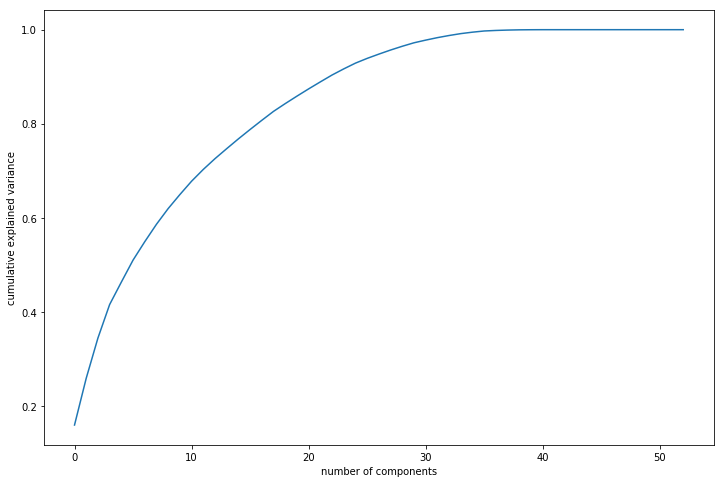

In [1817]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [1818]:
pca.explained_variance_ratio_[0:30].sum()

0.9721363041294667

In [1819]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

#### Looks like 30 components are enough to describe 97% of the variance in the dataset
- We'll choose 30 components for our modeling

#### Basis transformation and filtering columns - getting the data onto our PCs

In [1820]:
df_train_pca = pca_final.fit_transform(X_train_smote)
df_train_pca.shape

(36586, 30)

In [1821]:
# df_train_pca.head()

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [1822]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

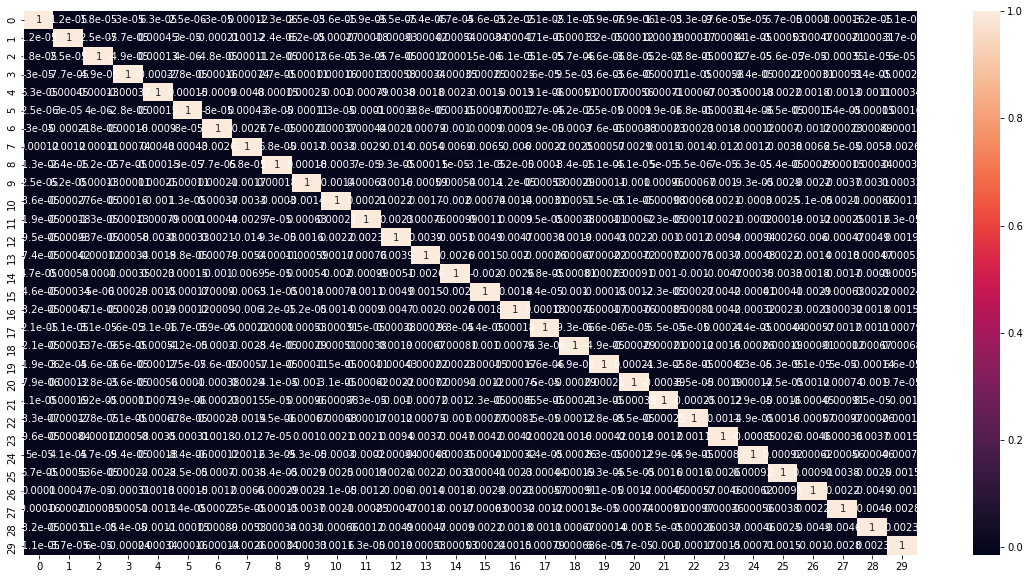

In [1823]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### There is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [1824]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8349, 30)

In [1825]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009390711563089507 , min corr:  -0.013751525410317328


#### There is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

### Using Logistic Regression

In [1826]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_smote)

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1827]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pcab)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.74'

In [1836]:
len(pred_probs_test)

8349

In [1837]:
len(y_test)

8349

In [1867]:
### Making Predictions

# Predicted probabilities
y_pred = model_pca.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


,churn,Churn_Prob,predicted
0,0,0.449377,1
1,0,0.584055,1
2,0,0.443188,1
3,0,0.330864,0
4,0,0.078049,0


In [1861]:
df_test_pca.shape

(8349, 30)

In [1868]:
print(pd.crosstab(y_test,y_pred_final['predicted']))

predicted     0     1
churn                
0          1062  1316
1            73    70
